# Introduction à Pandas
L'objectif est de fournir quelques outils pour représenter les données à l'aide de la librairie pandas. 

## Pandas

**pandas** est une librairie de python adaptée aux structures de données et à la manipulation et à l'analyse de données.
Cette librairie implémente des modèle essentiellement linéaires, pour aller au-delà on pourra utiliser autres librairies comme **statsmodels** et **scikit-learn**.
**pandas** est adaptée à différents types de données:

* les tableaux (comme des tables SQL ou Excel)
* des données temporelles ordonnées ou non
* des matrices

Les structures primaires en pandas sont les *Series* (1D) et les *DataFrame* (2D) (feuille de données avec différents champs texte et /ou chiffres, c'est une collection d'objets de type *Series*)(analogie avec listes et matrices). 

**pandas** permet:
* de gérer les données manquantes ( marqueur: NaN)
* d'insérer ou de supprimer des données
* Aligner les données
* Grouper par fonctionnalité
* Fusionner les données
* Labéliser de façon hiérarchique que les axes



In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt

### La structure **Series**
C'est un tableau "1D" qui peut contenir n'importe quel type de données, le premier paramètre d'entrée correspond à l'index (la clé du dictionnaire) et le second les valeurs assignées à cet index, c'est un peu comme un dictionnaire de taille fixée. Mais ce sont deux objets de classes différentes!

In [2]:
exemple_dictionnaire = {"a":numpy.random.randn(1), "b":numpy.random.randn(1), "c":numpy.random.randn(1)}

In [3]:
type(exemple_dictionnaire) # type de l'objet exemple_dictionnaire 

dict

In [4]:
print(exemple_dictionnaire) # affichage du contenu de cet objet

{'a': array([-0.20467384]), 'b': array([-0.83617918]), 'c': array([-1.25645339])}


In [5]:
print(exemple_dictionnaire['b']) # affichage de la valeur assignée à la clé 'b'

[-0.83617918]


### Création d'une *Series* à partir d'un dictionnaire:

In [6]:
exemple_serie1 = pandas.Series({"a":1, "b":1, "c":1})

In [7]:
type(exemple_serie1)

pandas.core.series.Series

In [8]:
print(exemple_serie1)

a    1
b    1
c    1
dtype: int64


In [9]:
print(exemple_serie1.index)

Index(['a', 'b', 'c'], dtype='object')


**Series** a le comportement d'un dictionnaire:

In [10]:
print(exemple_serie1['b'])

1


### Création d'une *Series* sans dictionnaire
On crée un objet Series sans l'utilisation d'un dictionnaire

In [11]:
exemple_serie2 = pandas.Series(numpy.random.randn(10), index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])


In [12]:
type(exemple_serie2) # Type de l'objet: ce n'est plus un dictionnaire mais un objet Pandas de type Series

pandas.core.series.Series

In [13]:
print(exemple_serie2)

a   -0.275465
b    1.192327
c    0.199814
d   -0.455737
e   -0.409481
f    1.118233
g    1.198196
h   -0.592087
i   -0.492967
j   -0.828571
dtype: float64


In [14]:
print(exemple_serie2['b']) # affiche la valeur associée à la clé 'b'

1.1923265659828737


In [15]:
print(exemple_serie2.index) # affiche les index de la Series

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')


#### Similarité avec ndarray

**Series** est très similaire à **ndarray** et peut donc être utilisé avec les fonctions **Numpy** qui acceptent **ndarray**:

In [16]:
print(exemple_serie1)

a    1
b    1
c    1
dtype: int64


In [17]:
print(exemple_serie1.median()) # calcule la médiane des valeurs contenues dans la Series

1.0


In [18]:
print(exemple_serie1[exemple_serie1 > exemple_serie1.median()])
# affiche les index et valeurs de exemple_serie1 qui sont > à la valeur médiane

Series([], dtype: int64)


In [19]:
print(exemple_serie2)

a   -0.275465
b    1.192327
c    0.199814
d   -0.455737
e   -0.409481
f    1.118233
g    1.198196
h   -0.592087
i   -0.492967
j   -0.828571
dtype: float64


In [20]:
print(exemple_serie2[0])# affiche la valeur en position 0

-0.2754646534216695


/var/folders/gp/4x8fg8dj6kl1b8qdc6108qp80000gn/T/ipykernel_5318/1404626802.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(exemple_serie2[0])# affiche la valeur en position 0


In [21]:
print(exemple_serie2.median())# calcule la médiane des valeurs contenues dans la Series

-0.3424726149858818


In [22]:
print(exemple_serie2[exemple_serie2 > exemple_serie2.median()])
# affiche les index et valeurs de exemple_serie2 qui sont > à la valeur médiane

a   -0.275465
b    1.192327
c    0.199814
f    1.118233
g    1.198196
dtype: float64


#### Somme de Series
de même taille

In [23]:
print(exemple_serie1 + exemple_serie1)

a    2
b    2
c    2
dtype: int64


In [24]:
print(exemple_serie2 + exemple_serie2)

a   -0.550929
b    2.384653
c    0.399628
d   -0.911474
e   -0.818961
f    2.236466
g    2.396391
h   -1.184174
i   -0.985935
j   -1.657142
dtype: float64


de taille différentes: on somme les valeurs ayant le même index.

In [25]:
print(exemple_serie1 + exemple_serie2)

a    0.724535
b    2.192327
c    1.199814
d         NaN
e         NaN
f         NaN
g         NaN
h         NaN
i         NaN
j         NaN
dtype: float64


Une grande différence avec **ndarray** est que les additions se font en alignant les index:

In [26]:
dictionnaire2 = {"c":numpy.random.randn(1), "d":numpy.random.randn(1), "a":numpy.random.randn(1)}

In [27]:
print(dictionnaire2)

{'c': array([-0.1107426]), 'd': array([0.33462147]), 'a': array([0.35806743])}


In [28]:
exemple_serie3 = pandas.Series(dictionnaire2)

In [29]:
print(exemple_serie2 + exemple_serie3)

a     [0.08260277998727783]
b                       NaN
c     [0.08907133262982635]
d    [-0.12111562647243429]
e                       NaN
f                       NaN
g                       NaN
h                       NaN
i                       NaN
j                       NaN
dtype: object


### Transformer en liste la Serie 

In [30]:
print(exemple_serie2)
colonne_1=exemple_serie2.index.tolist() # on met les index dans une liste
colonne_2=exemple_serie2.tolist() # on met les valeurs dans une liste
print(colonne_1)
print(colonne_2)

a   -0.275465
b    1.192327
c    0.199814
d   -0.455737
e   -0.409481
f    1.118233
g    1.198196
h   -0.592087
i   -0.492967
j   -0.828571
dtype: float64
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
[-0.2754646534216695, 1.1923265659828737, 0.19981393481828835, -0.4557371001197639, -0.4094805765500941, 1.1182328265736117, 1.1981956114931365, -0.5920872264242933, -0.4929673280156369, -0.8285710962969328]


### Attribut nom
On peut donner un nom à la série:

In [31]:
exemple_serie = pandas.Series(numpy.random.randn(10), index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], name = "mes_nombres_aleatoires")

In [32]:
print(exemple_serie.name)

mes_nombres_aleatoires


### La structure DataFrame
C'est un tableau à '2D' avec des colonnes de types potentiellement différents. C'est une collection de **Series**. 
**DataFrame** accepte différentes entrées:
* un dictionnaire 1D de **ndarrays** de listes ou de **Series**
* un tableau 2D **numpy.ndarray**
* une **Series**
* une autre **DataFrame**

* un dictionnaire de **Series**

In [33]:
dictionn_dataframe = {'aleatoire': pandas.Series(numpy.random.randn(3), 
                                                 index=['a', 'b', 'c']),
                      'entier': pandas.Series([1., 2., 3., 4.], 
                                              index=['a', 'b', 'c', 'd'])}

In [34]:
exemple_dataframe = pandas.DataFrame(dictionn_dataframe)
print(exemple_dataframe)

   aleatoire  entier
a  -0.785406     1.0
b   0.257441     2.0
c  -0.738513     3.0
d        NaN     4.0


In [35]:
print(exemple_dataframe.columns) # affichage des noms des colonnes
print(exemple_dataframe.index)# affichage des index

Index(['aleatoire', 'entier'], dtype='object')
Index(['a', 'b', 'c', 'd'], dtype='object')


* un dictionnaire de **ndarrays** 

In [36]:
dictionn2_dataframe = {'float': [0.18, 0.24, 0.34, 0.45],'entier': [1., 2., 3., 4.]}

In [37]:
exemple_dataframe2 = pandas.DataFrame(dictionn2_dataframe)

In [38]:
print(exemple_dataframe2)

   float  entier
0   0.18     1.0
1   0.24     2.0
2   0.34     3.0
3   0.45     4.0


* avec un dictionnaire d'objets constitués de différents éléments: des  *Series*, des array numpy...

In [39]:
bd1 = pandas.DataFrame({'Etape': 1.,
   ...:                     'Date': (pandas.Timestamp('20241125'),pandas.Timestamp('20241126'),pandas.Timestamp('20241127'),pandas.Timestamp('20241128')),
   ...:                     'coefficient': pandas.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'periode': numpy.array([3] * 4, dtype='int32'),
   ...:                     'Sexe': pandas.Categorical(["homme", "homme", "femme", "enfant"]),
   ...:                     'Donnees': ('non valid','valid','valid','valid')})
   ...: 

In [40]:
print(bd1)

   Etape       Date  coefficient  periode    Sexe    Donnees
0    1.0 2024-11-25          1.0        3   homme  non valid
1    1.0 2024-11-26          1.0        3   homme      valid
2    1.0 2024-11-27          1.0        3   femme      valid
3    1.0 2024-11-28          1.0        3  enfant      valid


* Pour connaître les différents types d'objets:

In [41]:
bd1.dtypes

Etape                 float64
Date           datetime64[ns]
coefficient           float32
periode                 int32
Sexe                 category
Donnees                object
dtype: object

* Autre exemple de génération de dates

In [42]:
dates = pandas.date_range('2024-01-01', periods=12)
print(dates)


DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12'],
              dtype='datetime64[ns]', freq='D')


In [43]:
bd2 = pandas.DataFrame(numpy.random.randn(12, 12), index=dates, columns=list('ABCDEFGHIJKL'))
print(bd2)

                   A         B         C         D         E         F  \
2024-01-01 -0.103565 -1.822750 -1.155651 -0.940855  0.837627  0.238186   
2024-01-02  1.220637 -1.076354  0.740791  0.222129  1.122372  0.685918   
2024-01-03  1.430302  0.958019 -1.597806 -1.282940  0.440690  1.071819   
2024-01-04 -0.415643  0.404722 -1.467622  0.136530 -1.516754  0.475380   
2024-01-05  1.994659 -0.700610  1.672915 -0.020937 -1.697692  1.484108   
2024-01-06  0.153409  0.482701 -0.011030  0.091721  0.379644  0.324345   
2024-01-07 -0.579637  0.285591 -1.879295 -0.312761  1.495558 -2.669813   
2024-01-08  0.018563 -0.395460 -1.879156  1.123897 -0.522057  1.724680   
2024-01-09  1.105789 -0.147239  0.738792 -1.367949  0.037283  2.068714   
2024-01-10 -0.991117 -1.014487  1.500166 -0.614152  0.089299 -0.164166   
2024-01-11  0.847683  0.948440 -1.833895  0.656705  0.841357  0.852259   
2024-01-12  2.070763 -0.530745  0.434609  0.900983  0.366605 -0.562139   

                   G         H       

## Lecture de fichiers Coma Separated Value .csv 
Beaucoup de données sont enregistrées en .csv (https://www.data.gouv.fr/, https://catalog.data.gov/dataset?res_format=CSV, http://donnees.ville.montreal.qc.ca ...).
Prenons par exemple la base de ***ind_sudpaca_agglo.csv*** extraite à l'adresse: https://www.data.gouv.fr/fr/datasets/indices-de-qualite-de-l-air-des-principales-agglomerations-de-la-region-sud-pour-un-an-glissant-et-j/.
Cette base contient les indices de qualité de l'air des principales agglomérations de la région Sud.

### Pour les utilisateurs de Colab
rajouter 

from google.colab import files

uploaded = files.upload()

In [44]:
data = pandas.read_csv("/Users/thomasroujou/Desktop/ind_sudpaca_agglo.csv")
data

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur
0,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c1,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,6029,Cannes-Grasse-Antibes,3,0,4,2,0,#8DA71E
1,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c0,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,6088,Nice,4,0,3,3,0,#8DA71E
2,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bf,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,13001,Aix-en-Provence,2,0,3,2,0,#8DA71E
3,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,13055,Marseille,2,0,3,3,0,#8DA71E
4,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bd,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,83137,Toulon,1,0,4,2,0,#8DA71E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f4,31-12-2018 00:00:00,4,Bon,AtmoSud,commune,6088,Nice,4,0,2,4,0,#8DA71E
4046,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f3,31-12-2018 00:00:00,4,Bon,AtmoSud,commune,13001,Aix-en-Provence,3,0,2,4,0,#8DA71E
4047,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f2,31-12-2018 00:00:00,5,Moyen,AtmoSud,commune,13055,Marseille,3,0,1,5,0,#F4B638
4048,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f1,31-12-2018 00:00:00,7,Médiocre,AtmoSud,commune,83137,Toulon,3,0,2,7,0,#F4B638


In [45]:
print(data)

                                                    FID             date_ech  \
0     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c1  01-01-2018 00:00:00   
1     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c0  01-01-2018 00:00:00   
2     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bf  01-01-2018 00:00:00   
3     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be  01-01-2018 00:00:00   
4     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bd  01-01-2018 00:00:00   
...                                                 ...                  ...   
4045  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f4  31-12-2018 00:00:00   
4046  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f3  31-12-2018 00:00:00   
4047  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f2  31-12-2018 00:00:00   
4048  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f1  31-12-2018 00:00:00   
4049  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f0  31-12-2018 00:00:00   

      valeur    qualif   source type_zo

### Affichage d'une ligne

In [46]:
print(data.loc[238]) #ligne 238

FID          ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-22d3
date_ech                                   02-09-2018 00:00:00
valeur                                                       5
qualif                                                   Moyen
source                                                 AtmoSud
type_zone                                              commune
code_zone                                                83137
lib_zone                                                Toulon
val_no2                                                      3
val_so2                                                      0
val_o3                                                       5
val_pm10                                                     2
val_pm25                                                     0
couleur                                                #F4B638
Name: 238, dtype: object


data est un objet de type ***DataFrame***:

In [47]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


##### Taille de l'objet

In [48]:
print(data.shape)

(4050, 14)


##### Premières lignes du jeu de données

In [49]:
print(data.head())

                                                 FID             date_ech  \
0  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c1  01-01-2018 00:00:00   
1  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c0  01-01-2018 00:00:00   
2  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bf  01-01-2018 00:00:00   
3  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be  01-01-2018 00:00:00   
4  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bd  01-01-2018 00:00:00   

   valeur qualif   source type_zone  code_zone               lib_zone  \
0       4    Bon  AtmoSud   commune       6029  Cannes-Grasse-Antibes   
1       4    Bon  AtmoSud   commune       6088                   Nice   
2       3    Bon  AtmoSud   commune      13001        Aix-en-Provence   
3       3    Bon  AtmoSud   commune      13055              Marseille   
4       4    Bon  AtmoSud   commune      83137                 Toulon   

   val_no2  val_so2  val_o3  val_pm10  val_pm25  couleur  
0        3        0       4         2  

##### Dernières lignes du jeu de données

In [50]:
print(data.tail())

                                                    FID             date_ech  \
4045  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f4  31-12-2018 00:00:00   
4046  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f3  31-12-2018 00:00:00   
4047  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f2  31-12-2018 00:00:00   
4048  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f1  31-12-2018 00:00:00   
4049  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f0  31-12-2018 00:00:00   

      valeur    qualif   source type_zone  code_zone         lib_zone  \
4045       4       Bon  AtmoSud   commune       6088             Nice   
4046       4       Bon  AtmoSud   commune      13001  Aix-en-Provence   
4047       5     Moyen  AtmoSud   commune      13055        Marseille   
4048       7  Médiocre  AtmoSud   commune      83137           Toulon   
4049       3       Bon  AtmoSud   commune      84007          Avignon   

      val_no2  val_so2  val_o3  val_pm10  val_pm25  couleur  
4045        4     

##### Listes des colonnes

In [51]:
print(data.columns)

Index(['FID', 'date_ech', 'valeur', 'qualif', 'source', 'type_zone',
       'code_zone', 'lib_zone', 'val_no2', 'val_so2', 'val_o3', 'val_pm10',
       'val_pm25', 'couleur'],
      dtype='object')


##### Type de chaque colonne

In [52]:
print(data.dtypes)

FID          object
date_ech     object
valeur        int64
qualif       object
source       object
type_zone    object
code_zone     int64
lib_zone     object
val_no2       int64
val_so2       int64
val_o3        int64
val_pm10      int64
val_pm25      int64
couleur      object
dtype: object


##### Informations sur les données

In [53]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FID        4050 non-null   object
 1   date_ech   4050 non-null   object
 2   valeur     4050 non-null   int64 
 3   qualif     4050 non-null   object
 4   source     4050 non-null   object
 5   type_zone  4050 non-null   object
 6   code_zone  4050 non-null   int64 
 7   lib_zone   4050 non-null   object
 8   val_no2    4050 non-null   int64 
 9   val_so2    4050 non-null   int64 
 10  val_o3     4050 non-null   int64 
 11  val_pm10   4050 non-null   int64 
 12  val_pm25   4050 non-null   int64 
 13  couleur    4050 non-null   object
dtypes: int64(7), object(7)
memory usage: 443.1+ KB
None


## Manipulation des variables

### Accès à une colonne

In [54]:
data_valeur=data['valeur'] # colonne d'index valeur

In [55]:
print(data_valeur)

0       4
1       4
2       3
3       3
4       4
       ..
4045    4
4046    4
4047    5
4048    7
4049    3
Name: valeur, Length: 4050, dtype: int64


In [56]:
data_zones=data['lib_zone']# colonne d'index lib_zone

In [57]:
print(data_zones)

0       Cannes-Grasse-Antibes
1                        Nice
2             Aix-en-Provence
3                   Marseille
4                      Toulon
                ...          
4045                     Nice
4046          Aix-en-Provence
4047                Marseille
4048                   Toulon
4049                  Avignon
Name: lib_zone, Length: 4050, dtype: object


* Autre syntaxe

In [58]:
print(data.lib_zone)

0       Cannes-Grasse-Antibes
1                        Nice
2             Aix-en-Provence
3                   Marseille
4                      Toulon
                ...          
4045                     Nice
4046          Aix-en-Provence
4047                Marseille
4048                   Toulon
4049                  Avignon
Name: lib_zone, Length: 4050, dtype: object


### Accès à plusieurs colonnes

In [59]:
data[['lib_zone', 'valeur']] # colonnes d'index lib_zone et valeur

,lib_zone,valeur
0,Cannes-Grasse-Antibes,4
1,Nice,4
2,Aix-en-Provence,3
3,Marseille,3
4,Toulon,4
...,...,...
4045,Nice,4
4046,Aix-en-Provence,4
4047,Marseille,5
4048,Toulon,7


### Statistiques descriptives d'une colonne

In [60]:
print(data['valeur'].describe()) 

count    4050.000000
mean        4.482222
std         1.092332
min         2.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: valeur, dtype: float64


In [61]:
print(data['valeur'].mean()) # moyenne

4.482222222222222


In [62]:
print(data['valeur'].std())# écart-type

1.0923316536613392


### Comptage des valeurs:
On veut par exemple décompter combien de données on été enregistrées dans chaque ville.

In [63]:
print(data['lib_zone'].value_counts()) 

lib_zone
Cannes-Grasse-Antibes    675
Nice                     675
Aix-en-Provence          675
Marseille                675
Toulon                   675
Avignon                  675
Name: count, dtype: int64


#### Tri du champ  valeur de façon croissante:

In [64]:
print(data['valeur'].sort_values())

11      2
2018    2
2807    2
2933    2
1092    2
       ..
2763    8
365     8
226     8
3797    8
3908    9
Name: valeur, Length: 4050, dtype: int64


#### Indices des valeurs triées

In [65]:
print(data['valeur'].argsort())

0         11
1       2018
2       2807
3       2933
4       1092
        ... 
4045    2763
4046     365
4047     226
4048    3797
4049    3908
Name: valeur, Length: 4050, dtype: int64


In [66]:
print(data['lib_zone'].argsort()) # indice des valeurs triées par ordre alphabétique

0       2024
1       2402
2       2396
3        662
4       2390
        ... 
4045    2098
4046    3478
4047     472
4048    3484
4049    2806
Name: lib_zone, Length: 4050, dtype: int64


## Les requêtes

On cherche à extraire toutes les données concernant la ville de Marseille dans le champ lib_zone:

In [67]:
print(data['lib_zone']=="Marseille")

0       False
1       False
2       False
3        True
4       False
        ...  
4045    False
4046    False
4047     True
4048    False
4049    False
Name: lib_zone, Length: 4050, dtype: bool


Seuls les champs True seront considérés par ***.loc***

In [68]:
donnees_Marseille = data.loc[data['lib_zone']=="Marseille"]
print(donnees_Marseille)

                                                    FID             date_ech  \
3     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be  01-01-2018 00:00:00   
9     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b8  01-01-2019 00:00:00   
15    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b2  01-02-2018 00:00:00   
21    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23ac  01-02-2019 00:00:00   
27    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23a6  01-03-2018 00:00:00   
...                                                 ...                  ...   
4023  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-140a  31-08-2018 00:00:00   
4029  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-1404  31-08-2019 00:00:00   
4035  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13fe  31-10-2018 00:00:00   
4041  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f8  31-10-2019 00:00:00   
4047  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f2  31-12-2018 00:00:00   

      valeur qualif   source type_zone 

On peut ensuite réaliser des comptes, des statistiques sur ce tableau:

In [69]:
print(donnees_Marseille['valeur'].value_counts())
 

valeur
4    243
5    184
3    129
6     84
7     21
8      8
2      6
Name: count, dtype: int64


In [70]:
print(donnees_Marseille['valeur'].mean())
 

4.453333333333333


#### Extraction de données ayant des caractéristiques particulières:
On peut chercher à extraire des données de Marseille, les colonnes correspondants aux valeurs des indices 3 et 4.
On commence par regarder si le tableau contient les valeurs souhaitées ( 3 et 4) avec la fonction 'is in': **isin**

In [71]:
print(donnees_Marseille['valeur'].isin([3,4]))

3        True
9        True
15       True
21       True
27       True
        ...  
4023     True
4029    False
4035     True
4041    False
4047    False
Name: valeur, Length: 675, dtype: bool


On peut ensuite extraire le sous-tableau contenant ces indices:

In [72]:
print(donnees_Marseille.loc[donnees_Marseille['valeur'].isin([3,4])])

                                                    FID             date_ech  \
3     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be  01-01-2018 00:00:00   
9     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b8  01-01-2019 00:00:00   
15    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b2  01-02-2018 00:00:00   
21    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23ac  01-02-2019 00:00:00   
27    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23a6  01-03-2018 00:00:00   
...                                                 ...                  ...   
3987  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-142e  31-03-2018 00:00:00   
3999  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-1422  31-05-2018 00:00:00   
4017  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-1410  31-07-2019 00:00:00   
4023  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-140a  31-08-2018 00:00:00   
4035  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13fe  31-10-2018 00:00:00   

      valeur qualif   source type_zone 

### Utilisation d'opérateurs logiques pour extraire des données:
On veut par exemple extraite un sous-tableau contenant les données à Marseille où les indices de l'air  sont égaux à trois ET (puis OU)  l'indice du dioxyde d'azote est égal à 3. 

In [73]:
print(donnees_Marseille.loc[(donnees_Marseille['valeur'] == 3) & (donnees_Marseille['val_no2'] == 3)] )

                                                    FID             date_ech  \
15    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b2  01-02-2018 00:00:00   
21    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23ac  01-02-2019 00:00:00   
117   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-234c  01-10-2019 00:00:00   
135   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-233a  01-12-2018 00:00:00   
141   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-2334  02-01-2018 00:00:00   
147   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-232e  02-01-2019 00:00:00   
153   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-2328  02-02-2018 00:00:00   
261   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-22bc  02-11-2018 00:00:00   
273   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-22b0  02-12-2018 00:00:00   
291   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-229e  03-02-2018 00:00:00   
399   ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-2232  03-11-2018 00:00:00   
411   ind_sudpaca_agglo.fid--48cd4d03_16

In [74]:
print(donnees_Marseille.loc[(donnees_Marseille['valeur'] == 3) | (donnees_Marseille['val_no2'] == 3)] )

                                                    FID             date_ech  \
3     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be  01-01-2018 00:00:00   
9     ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b8  01-01-2019 00:00:00   
15    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b2  01-02-2018 00:00:00   
21    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23ac  01-02-2019 00:00:00   
39    ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-239a  01-04-2018 00:00:00   
...                                                 ...                  ...   
3987  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-142e  31-03-2018 00:00:00   
3993  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-1428  31-03-2019 00:00:00   
4029  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-1404  31-08-2019 00:00:00   
4041  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f8  31-10-2019 00:00:00   
4047  ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-13f2  31-12-2018 00:00:00   

      valeur qualif   source type_zone 

On veut récupérer dans toute notre BDD les données qui ont un indice de dioxyde d'azote > 3 et n'afficher pour ces données extraites que les champs lib_zone et val_no2

In [75]:
selection_indices_n02 = data[data.val_no2>3]
print(selection_indices_n02[["lib_zone", "val_no2"]])

                   lib_zone  val_no2
1                      Nice        4
13                     Nice        4
31                     Nice        5
36    Cannes-Grasse-Antibes        4
37                     Nice        6
...                     ...      ...
4009                   Nice        7
4011              Marseille        4
4012                 Toulon        4
4027                   Nice        6
4045                   Nice        4

[611 rows x 2 columns]


## Croisement des variables
Il est possible de croiser des variables et d'effectuer simultanément des calculs (comptage et statistiques).

Création d'un tableau contenant le nombre de fois où le couple (val_no2,valeur) apparaît dans les datas.

In [76]:
print(pandas.crosstab(data['valeur'], data['val_no2']))

val_no2    1    2    3    4   5   6  7
valeur                                
2         13   15    0    0   0   0  0
3        251  227  246    0   0   0  0
4        390  359  438  238   0   0  0
5        277  370  372  116  91   0  0
6         79  123  142   62  27  29  0
7         26   40   47   24  13   4  4
8          4    8   11    0   3   0  0
9          1    0    0    0   0   0  0


On peut réaliser un tableau croisé avec la moyenne des indices de l'air par exemple, (la moyenne se fait sur le champ 'values')

In [77]:
print(pandas.crosstab(data['lib_zone'], data['val_no2'], values = data['valeur'], aggfunc = pandas.Series.mean))

val_no2                       1         2         3         4         5  \
lib_zone                                                                  
Aix-en-Provence        4.354680  4.617391  4.543353  4.781818  5.583333   
Avignon                4.356707  4.479042  4.797297  4.933333  6.000000   
Cannes-Grasse-Antibes  4.166667  4.357759  4.274900  4.773333  5.214286   
Marseille              4.084507  4.443850  4.422131  4.779221  5.789474   
Nice                   4.210526  4.102804  4.299625  4.484076  5.320988   
Toulon                 4.135965  4.511416  4.757225  5.021739  6.500000   

val_no2                       6    7  
lib_zone                              
Aix-en-Provence        6.000000  NaN  
Avignon                     NaN  NaN  
Cannes-Grasse-Antibes  6.000000  NaN  
Marseille              6.333333  NaN  
Nice                   6.047619  7.0  
Toulon                 6.333333  NaN  


### Utilisation de groupby
Cette fonction permet de créer un objet en regroupant les données suivant le critère/ la classe précisé(e),
ici on regroupe les données par 'lib_zone' et on réalise une moyenne des autres champs: 'valeur', 'code_zone'....

In [78]:
tab_moy_champ_lib_zone = data.groupby('lib_zone').mean(numeric_only=True)

In [79]:
data.head() # objet de type data frame

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur
0,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c1,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,6029,Cannes-Grasse-Antibes,3,0,4,2,0,#8DA71E
1,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c0,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,6088,Nice,4,0,3,3,0,#8DA71E
2,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bf,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,13001,Aix-en-Provence,2,0,3,2,0,#8DA71E
3,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,13055,Marseille,2,0,3,3,0,#8DA71E
4,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bd,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,83137,Toulon,1,0,4,2,0,#8DA71E


In [80]:
tab_moy_champ_lib_zone.values.tolist()

[[4.554074074074074,
  13001.0,
  2.1837037037037037,
  0.0,
  4.164444444444444,
  3.408888888888889,
  0.0],
 [4.514074074074074,
  84007.0,
  1.8311111111111111,
  0.0,
  4.151111111111111,
  3.265185185185185,
  0.0],
 [4.364444444444445,
  6029.0,
  2.511111111111111,
  0.0,
  4.077037037037037,
  3.468148148148148,
  0.0],
 [4.453333333333333,
  13055.0,
  2.4992592592592593,
  0.0,
  4.069629629629629,
  3.3777777777777778,
  0.0],
 [4.499259259259259,
  6088.0,
  3.3185185185185184,
  0.0,
  4.034074074074074,
  3.448888888888889,
  0.0],
 [4.508148148148148,
  83137.0,
  2.0992592592592594,
  0.0,
  4.133333333333334,
  3.6222222222222222,
  0.0]]

In [81]:
print(tab_moy_champ_lib_zone)

                         valeur  code_zone   val_no2  val_so2    val_o3  \
lib_zone                                                                  
Aix-en-Provence        4.554074    13001.0  2.183704      0.0  4.164444   
Avignon                4.514074    84007.0  1.831111      0.0  4.151111   
Cannes-Grasse-Antibes  4.364444     6029.0  2.511111      0.0  4.077037   
Marseille              4.453333    13055.0  2.499259      0.0  4.069630   
Nice                   4.499259     6088.0  3.318519      0.0  4.034074   
Toulon                 4.508148    83137.0  2.099259      0.0  4.133333   

                       val_pm10  val_pm25  
lib_zone                                   
Aix-en-Provence        3.408889       0.0  
Avignon                3.265185       0.0  
Cannes-Grasse-Antibes  3.468148       0.0  
Marseille              3.377778       0.0  
Nice                   3.448889       0.0  
Toulon                 3.622222       0.0  


Si l'on veut ne faire une moyenne que selon le champ 'valeur':

In [82]:
tab_zone = data.groupby('lib_zone')
print(tab_zone['valeur'].mean())

lib_zone
Aix-en-Provence          4.554074
Avignon                  4.514074
Cannes-Grasse-Antibes    4.364444
Marseille                4.453333
Nice                     4.499259
Toulon                   4.508148
Name: valeur, dtype: float64


Et si l'on veut extraire deux groupes:

In [83]:
tab_zone_et_valeur = data.groupby(['lib_zone','valeur'])
print(tab_zone_et_valeur.count())

                              FID  date_ech  qualif  source  type_zone  \
lib_zone              valeur                                             
Aix-en-Provence       2         6         6       6       6          6   
                      3       117       117     117     117        117   
                      4       234       234     234     234        234   
                      5       187       187     187     187        187   
                      6        84        84      84      84         84   
                      7        41        41      41      41         41   
                      8         5         5       5       5          5   
                      9         1         1       1       1          1   
Avignon               2        10        10      10      10         10   
                      3       149       149     149     149        149   
                      4       199       199     199     199        199   
                      5       183     

In [84]:
print(tab_zone_et_valeur['type_zone'].count())

lib_zone               valeur
Aix-en-Provence        2           6
                       3         117
                       4         234
                       5         187
                       6          84
                       7          41
                       8           5
                       9           1
Avignon                2          10
                       3         149
                       4         199
                       5         183
                       6          77
                       7          49
                       8           8
Cannes-Grasse-Antibes  2           3
                       3         123
                       4         260
                       5         216
                       6          60
                       7          13
Marseille              2           6
                       3         129
                       4         243
                       5         184
                       6          84
        

### Tables pivot:
Il est possible de restructurer le tableau de données de sorte à lui donner les attributs et dimensions pertinents pour notre étude.

In [85]:
TP = pandas.pivot_table(data, values = ['val_no2', 'val_pm10', 'val_o3'], index = 'lib_zone', aggfunc = numpy.mean)
print(TP)

                        val_no2    val_o3  val_pm10
lib_zone                                           
Aix-en-Provence        2.183704  4.164444  3.408889
Avignon                1.831111  4.151111  3.265185
Cannes-Grasse-Antibes  2.511111  4.077037  3.468148
Marseille              2.499259  4.069630  3.377778
Nice                   3.318519  4.034074  3.448889
Toulon                 2.099259  4.133333  3.622222


/var/folders/gp/4x8fg8dj6kl1b8qdc6108qp80000gn/T/ipykernel_5318/3203604638.py:1: FutureWarning: The provided callable <function mean at 0x108765580> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  TP = pandas.pivot_table(data, values = ['val_no2', 'val_pm10', 'val_o3'], index = 'lib_zone', aggfunc = numpy.mean)


## Chainage des opérations
Cette méthode permet de rendre le code lisible et modifiable facilement.

In [86]:
tab_zone = data.groupby('lib_zone')
print(tab_zone['valeur'].mean())

lib_zone
Aix-en-Provence          4.554074
Avignon                  4.514074
Cannes-Grasse-Antibes    4.364444
Marseille                4.453333
Nice                     4.499259
Toulon                   4.508148
Name: valeur, dtype: float64


peut se ré-écrire de façon chainée avec:

In [87]:
(data
    .groupby(['lib_zone'])['valeur'].mean()
    
)

lib_zone
Aix-en-Provence          4.554074
Avignon                  4.514074
Cannes-Grasse-Antibes    4.364444
Marseille                4.453333
Nice                     4.499259
Toulon                   4.508148
Name: valeur, dtype: float64

In [88]:
tab_zone_et_valeur = data.groupby(['lib_zone','valeur'])
print(tab_zone_et_valeur['type_zone'].count())

lib_zone               valeur
Aix-en-Provence        2           6
                       3         117
                       4         234
                       5         187
                       6          84
                       7          41
                       8           5
                       9           1
Avignon                2          10
                       3         149
                       4         199
                       5         183
                       6          77
                       7          49
                       8           8
Cannes-Grasse-Antibes  2           3
                       3         123
                       4         260
                       5         216
                       6          60
                       7          13
Marseille              2           6
                       3         129
                       4         243
                       5         184
                       6          84
        

peut se ré-écrire de façon chainée avec:

In [89]:
(data
    .groupby(['lib_zone','valeur'])['type_zone'].count()
    
)

lib_zone               valeur
Aix-en-Provence        2           6
                       3         117
                       4         234
                       5         187
                       6          84
                       7          41
                       8           5
                       9           1
Avignon                2          10
                       3         149
                       4         199
                       5         183
                       6          77
                       7          49
                       8           8
Cannes-Grasse-Antibes  2           3
                       3         123
                       4         260
                       5         216
                       6          60
                       7          13
Marseille              2           6
                       3         129
                       4         243
                       5         184
                       6          84
        

# Exemple de mise en forme d'une base de données pour qu'elle soit exploitable: 

On trouve sur la toile des bases de données mais elles doivent être souvent modifiés pour être exploitables.
On prendra l'exemple de données sur le Vendée Globe 2020. Le site officiel: https://www.vendeeglobe.org fournit des données en format excel.
On pourra télécharger le fichier "vendeeglobe_20201123_080000.xlsx"

### Lecture du fichier xlsx

### Pour les utilisateurs de Colab
rajouter 

from google.colab import files

uploaded = files.upload()

In [90]:
vendee_globe = pandas.read_excel("/Users/thomasroujou/Desktop/vendeeglobe_20201123_080000.xls")
display(vendee_globe)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Classement du lundi 23 novembre 2020 à 09h00 FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,1,\nFRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,...,125°,13.1 kts,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5 nm,0.0 nm
5,NaN,2,\nFRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,...,169°,9.1 kts,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5 nm,18.0 nm
6,NaN,3,\nFRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,...,147°,8.2 kts,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8 nm,262.3 nm
7,NaN,4,\nFRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,...,137°,13.6 kts,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6 nm,274.2 nm
8,NaN,5,\nGBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,...,133°,5.2 kts,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8 nm,294.4 nm
9,NaN,6,\nFRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,...,144°,13.3 kts,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3 nm,346.9 nm


### Suppression de lignes

In [91]:
suppression_ligne_debut = vendee_globe.drop(vendee_globe.index[0:2])
display (suppression_ligne_debut)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,1,\nFRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,...,125°,13.1 kts,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5 nm,0.0 nm
5,NaN,2,\nFRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,...,169°,9.1 kts,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5 nm,18.0 nm
6,NaN,3,\nFRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,...,147°,8.2 kts,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8 nm,262.3 nm
7,NaN,4,\nFRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,...,137°,13.6 kts,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6 nm,274.2 nm
8,NaN,5,\nGBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,...,133°,5.2 kts,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8 nm,294.4 nm
9,NaN,6,\nFRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,...,144°,13.3 kts,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3 nm,346.9 nm
10,NaN,7,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,08:30 FR\n,24°30.56'S,26°36.92'W,139°,13.6 kts,13.6 kts,...,138°,12.7 kts,12.7 kts,50.8 nm,140°,10.2 kts,10.2 kts,244.9 nm,19856.4 nm,355.0 nm
11,NaN,8,\nFRA 17,Yannick Bestaven\nMaître Coq IV,08:30 FR\n,24°14.63'S,26°20.23'W,149°,11.8 kts,11.6 kts,...,150°,12.5 kts,12.2 kts,50.0 nm,148°,10.8 kts,10.7 kts,258.2 nm,19857.2 nm,355.8 nm


In [92]:
suppression_ligne_fin = suppression_ligne_debut.drop(suppression_ligne_debut.index[34:40])
display (suppression_ligne_fin)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,1,\nFRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,...,125°,13.1 kts,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5 nm,0.0 nm
5,NaN,2,\nFRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,...,169°,9.1 kts,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5 nm,18.0 nm
6,NaN,3,\nFRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,...,147°,8.2 kts,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8 nm,262.3 nm
7,NaN,4,\nFRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,...,137°,13.6 kts,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6 nm,274.2 nm
8,NaN,5,\nGBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,...,133°,5.2 kts,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8 nm,294.4 nm
9,NaN,6,\nFRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,...,144°,13.3 kts,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3 nm,346.9 nm
10,NaN,7,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,08:30 FR\n,24°30.56'S,26°36.92'W,139°,13.6 kts,13.6 kts,...,138°,12.7 kts,12.7 kts,50.8 nm,140°,10.2 kts,10.2 kts,244.9 nm,19856.4 nm,355.0 nm
11,NaN,8,\nFRA 17,Yannick Bestaven\nMaître Coq IV,08:30 FR\n,24°14.63'S,26°20.23'W,149°,11.8 kts,11.6 kts,...,150°,12.5 kts,12.2 kts,50.0 nm,148°,10.8 kts,10.7 kts,258.2 nm,19857.2 nm,355.8 nm


### Suppression de colonnes

In [93]:
suppression_colonne = suppression_ligne_fin.drop(suppression_ligne_fin.columns[[0]], axis='columns')
display (suppression_colonne)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
2,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,NaN,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,1,\nFRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,7.3 nm,125°,13.1 kts,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5 nm,0.0 nm
5,2,\nFRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,6.5 nm,169°,9.1 kts,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5 nm,18.0 nm
6,3,\nFRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,5.0 nm,147°,8.2 kts,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8 nm,262.3 nm
7,4,\nFRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,7.8 nm,137°,13.6 kts,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6 nm,274.2 nm
8,5,\nGBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,2.8 nm,133°,5.2 kts,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8 nm,294.4 nm
9,6,\nFRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,5.6 nm,144°,13.3 kts,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3 nm,346.9 nm
10,7,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,08:30 FR\n,24°30.56'S,26°36.92'W,139°,13.6 kts,13.6 kts,6.8 nm,138°,12.7 kts,12.7 kts,50.8 nm,140°,10.2 kts,10.2 kts,244.9 nm,19856.4 nm,355.0 nm
11,8,\nFRA 17,Yannick Bestaven\nMaître Coq IV,08:30 FR\n,24°14.63'S,26°20.23'W,149°,11.8 kts,11.6 kts,5.9 nm,150°,12.5 kts,12.2 kts,50.0 nm,148°,10.8 kts,10.7 kts,258.2 nm,19857.2 nm,355.8 nm


### Renommer les colonnes 

Nom des colonnes actuelles

In [94]:
suppression_colonne.columns.tolist()

['Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20']

On renomme avec des noms plus explicites!

In [95]:
suppression_colonne.rename(columns={'Unnamed: 1': 'Rang', 'Unnamed: 2': 'Nationalité','Unnamed: 3' : 'Skipper','Unnamed: 4': 'Heure', 'Unnamed: 5': 'Latitude', 'Unnamed: 6': 'Longitude', 'Unnamed: 7': 'Cap_30', 'Unnamed: 8': 'Vitesse_30', 'Unnamed: 9': 'VMG_30', 'Unnamed: 10': 'Distance_30','Unnamed: 11': 'Cap_last','Unnamed: 12': 'Vitesse_last', 'Unnamed: 13': 'VMG_last','Unnamed: 14': 'Distance_last','Unnamed: 15': 'Cap_24','Unnamed: 16': 'Vitesse_24', 'Unnamed: 17': 'VMG_24','Unnamed: 18': 'Distance_24','Unnamed: 19': 'DTF', 'Unnamed: 20': 'DTL' }, inplace=True)
suppression_colonne.columns.tolist()

['Rang',
 'Nationalité',
 'Skipper',
 'Heure',
 'Latitude',
 'Longitude',
 'Cap_30',
 'Vitesse_30',
 'VMG_30',
 'Distance_30',
 'Cap_last',
 'Vitesse_last',
 'VMG_last',
 'Distance_last',
 'Cap_24',
 'Vitesse_24',
 'VMG_24',
 'Distance_24',
 'DTF',
 'DTL']

On supprime les deux premières lignes inutiles:

In [96]:
base_finale = suppression_colonne.drop(suppression_colonne.index[0:2])
display (base_finale)

,Rang,Nationalité,Skipper,Heure,Latitude,Longitude,Cap_30,Vitesse_30,VMG_30,Distance_30,Cap_last,Vitesse_last,VMG_last,Distance_last,Cap_24,Vitesse_24,VMG_24,Distance_24,DTF,DTL
4,1,\nFRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,7.3 nm,125°,13.1 kts,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5 nm,0.0 nm
5,2,\nFRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,6.5 nm,169°,9.1 kts,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5 nm,18.0 nm
6,3,\nFRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,5.0 nm,147°,8.2 kts,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8 nm,262.3 nm
7,4,\nFRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,7.8 nm,137°,13.6 kts,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6 nm,274.2 nm
8,5,\nGBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,2.8 nm,133°,5.2 kts,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8 nm,294.4 nm
9,6,\nFRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,5.6 nm,144°,13.3 kts,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3 nm,346.9 nm
10,7,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,08:30 FR\n,24°30.56'S,26°36.92'W,139°,13.6 kts,13.6 kts,6.8 nm,138°,12.7 kts,12.7 kts,50.8 nm,140°,10.2 kts,10.2 kts,244.9 nm,19856.4 nm,355.0 nm
11,8,\nFRA 17,Yannick Bestaven\nMaître Coq IV,08:30 FR\n,24°14.63'S,26°20.23'W,149°,11.8 kts,11.6 kts,5.9 nm,150°,12.5 kts,12.2 kts,50.0 nm,148°,10.8 kts,10.7 kts,258.2 nm,19857.2 nm,355.8 nm
12,9,\nFRA 4,Sébastien Simon\nARKEA PAPREC,08:30 FR\n,24°40.36'S,27°27.96'W,146°,13.7 kts,13.2 kts,6.8 nm,140°,13.0 kts,12.9 kts,52.0 nm,140°,10.8 kts,10.7 kts,258.6 nm,19884.1 nm,382.6 nm
13,10,\nFRA 109,Samantha Davies\nInitiatives - Coeur,08:30 FR\n,24°03.43'S,27°52.83'W,146°,15.9 kts,15.4 kts,7.9 nm,144°,11.7 kts,11.5 kts,46.8 nm,150°,10.4 kts,10.1 kts,248.5 nm,19925.5 nm,424.0 nm


### Extraction des données à représenter

In [97]:
donnees = base_finale[['Skipper', 'DTF']]
display(donnees)

,Skipper,DTF
4,Charlie Dalin\nAPIVIA,19501.5 nm
5,Thomas Ruyant\nLinkedOut,19519.5 nm
6,Jean Le Cam\nYes we Cam !,19763.8 nm
7,Kevin Escoffier\nPRB,19775.6 nm
8,Alex Thomson\nHUGO BOSS,19795.8 nm
9,Louis Burton\nBureau Vallée 2,19848.3 nm
10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,19856.4 nm
11,Yannick Bestaven\nMaître Coq IV,19857.2 nm
12,Sébastien Simon\nARKEA PAPREC,19884.1 nm
13,Samantha Davies\nInitiatives - Coeur,19925.5 nm


### Représentation

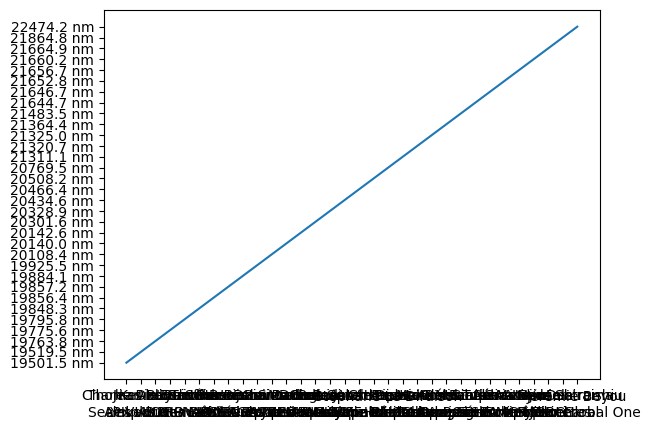

In [98]:
matplotlib.pyplot.plot(donnees['Skipper'], donnees['DTF'] )

In [99]:
### Suppression des unités (exemple nm dans la colonne DTF)

In [100]:
base_finale['DTF'].replace('nm','',regex=True,inplace=True) 
display(base_finale)

/var/folders/gp/4x8fg8dj6kl1b8qdc6108qp80000gn/T/ipykernel_5318/2022232684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_finale['DTF'].replace('nm','',regex=True,inplace=True)


,Rang,Nationalité,Skipper,Heure,Latitude,Longitude,Cap_30,Vitesse_30,VMG_30,Distance_30,Cap_last,Vitesse_last,VMG_last,Distance_last,Cap_24,Vitesse_24,VMG_24,Distance_24,DTF,DTL
4,1,\nFRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,7.3 nm,125°,13.1 kts,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5,0.0 nm
5,2,\nFRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,6.5 nm,169°,9.1 kts,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5,18.0 nm
6,3,\nFRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,5.0 nm,147°,8.2 kts,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8,262.3 nm
7,4,\nFRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,7.8 nm,137°,13.6 kts,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6,274.2 nm
8,5,\nGBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,2.8 nm,133°,5.2 kts,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8,294.4 nm
9,6,\nFRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,5.6 nm,144°,13.3 kts,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3,346.9 nm
10,7,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,08:30 FR\n,24°30.56'S,26°36.92'W,139°,13.6 kts,13.6 kts,6.8 nm,138°,12.7 kts,12.7 kts,50.8 nm,140°,10.2 kts,10.2 kts,244.9 nm,19856.4,355.0 nm
11,8,\nFRA 17,Yannick Bestaven\nMaître Coq IV,08:30 FR\n,24°14.63'S,26°20.23'W,149°,11.8 kts,11.6 kts,5.9 nm,150°,12.5 kts,12.2 kts,50.0 nm,148°,10.8 kts,10.7 kts,258.2 nm,19857.2,355.8 nm
12,9,\nFRA 4,Sébastien Simon\nARKEA PAPREC,08:30 FR\n,24°40.36'S,27°27.96'W,146°,13.7 kts,13.2 kts,6.8 nm,140°,13.0 kts,12.9 kts,52.0 nm,140°,10.8 kts,10.7 kts,258.6 nm,19884.1,382.6 nm
13,10,\nFRA 109,Samantha Davies\nInitiatives - Coeur,08:30 FR\n,24°03.43'S,27°52.83'W,146°,15.9 kts,15.4 kts,7.9 nm,144°,11.7 kts,11.5 kts,46.8 nm,150°,10.4 kts,10.1 kts,248.5 nm,19925.5,424.0 nm


,Skipper,DTF
4,Charlie Dalin\nAPIVIA,19501.5
5,Thomas Ruyant\nLinkedOut,19519.5
6,Jean Le Cam\nYes we Cam !,19763.8
7,Kevin Escoffier\nPRB,19775.6
8,Alex Thomson\nHUGO BOSS,19795.8
9,Louis Burton\nBureau Vallée 2,19848.3
10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,19856.4
11,Yannick Bestaven\nMaître Coq IV,19857.2
12,Sébastien Simon\nARKEA PAPREC,19884.1
13,Samantha Davies\nInitiatives - Coeur,19925.5


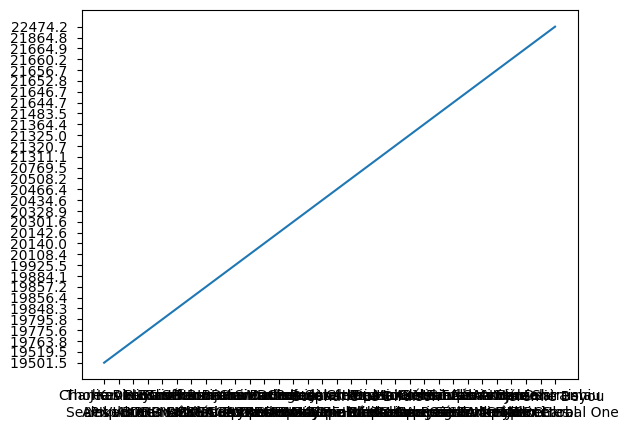

In [101]:
donnees = base_finale[['Skipper', 'DTF']]
display(donnees)
matplotlib.pyplot.plot(donnees['Skipper'], donnees['DTF'] )

Les noms sont trop longs, on va plutôt exploiter le champ "Nationalité" en supprimant le caractère "/n"

In [102]:
base_finale['Nationalité'].replace('\n','',regex=True,inplace=True) 
display(base_finale)

/var/folders/gp/4x8fg8dj6kl1b8qdc6108qp80000gn/T/ipykernel_5318/3880489657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_finale['Nationalité'].replace('\n','',regex=True,inplace=True)


,Rang,Nationalité,Skipper,Heure,Latitude,Longitude,Cap_30,Vitesse_30,VMG_30,Distance_30,Cap_last,Vitesse_last,VMG_last,Distance_last,Cap_24,Vitesse_24,VMG_24,Distance_24,DTF,DTL
4,1,FRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,7.3 nm,125°,13.1 kts,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5,0.0 nm
5,2,FRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,6.5 nm,169°,9.1 kts,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5,18.0 nm
6,3,FRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,5.0 nm,147°,8.2 kts,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8,262.3 nm
7,4,FRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,7.8 nm,137°,13.6 kts,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6,274.2 nm
8,5,GBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,2.8 nm,133°,5.2 kts,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8,294.4 nm
9,6,FRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,5.6 nm,144°,13.3 kts,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3,346.9 nm
10,7,MON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,08:30 FR\n,24°30.56'S,26°36.92'W,139°,13.6 kts,13.6 kts,6.8 nm,138°,12.7 kts,12.7 kts,50.8 nm,140°,10.2 kts,10.2 kts,244.9 nm,19856.4,355.0 nm
11,8,FRA 17,Yannick Bestaven\nMaître Coq IV,08:30 FR\n,24°14.63'S,26°20.23'W,149°,11.8 kts,11.6 kts,5.9 nm,150°,12.5 kts,12.2 kts,50.0 nm,148°,10.8 kts,10.7 kts,258.2 nm,19857.2,355.8 nm
12,9,FRA 4,Sébastien Simon\nARKEA PAPREC,08:30 FR\n,24°40.36'S,27°27.96'W,146°,13.7 kts,13.2 kts,6.8 nm,140°,13.0 kts,12.9 kts,52.0 nm,140°,10.8 kts,10.7 kts,258.6 nm,19884.1,382.6 nm
13,10,FRA 109,Samantha Davies\nInitiatives - Coeur,08:30 FR\n,24°03.43'S,27°52.83'W,146°,15.9 kts,15.4 kts,7.9 nm,144°,11.7 kts,11.5 kts,46.8 nm,150°,10.4 kts,10.1 kts,248.5 nm,19925.5,424.0 nm


,Nationalité,DTF
4,FRA 79,19501.5
5,FRA 59,19519.5
6,FRA 01,19763.8
7,FRA 85,19775.6
8,GBR 99,19795.8
9,FRA 18,19848.3
10,MON 10,19856.4
11,FRA 17,19857.2
12,FRA 4,19884.1
13,FRA 109,19925.5


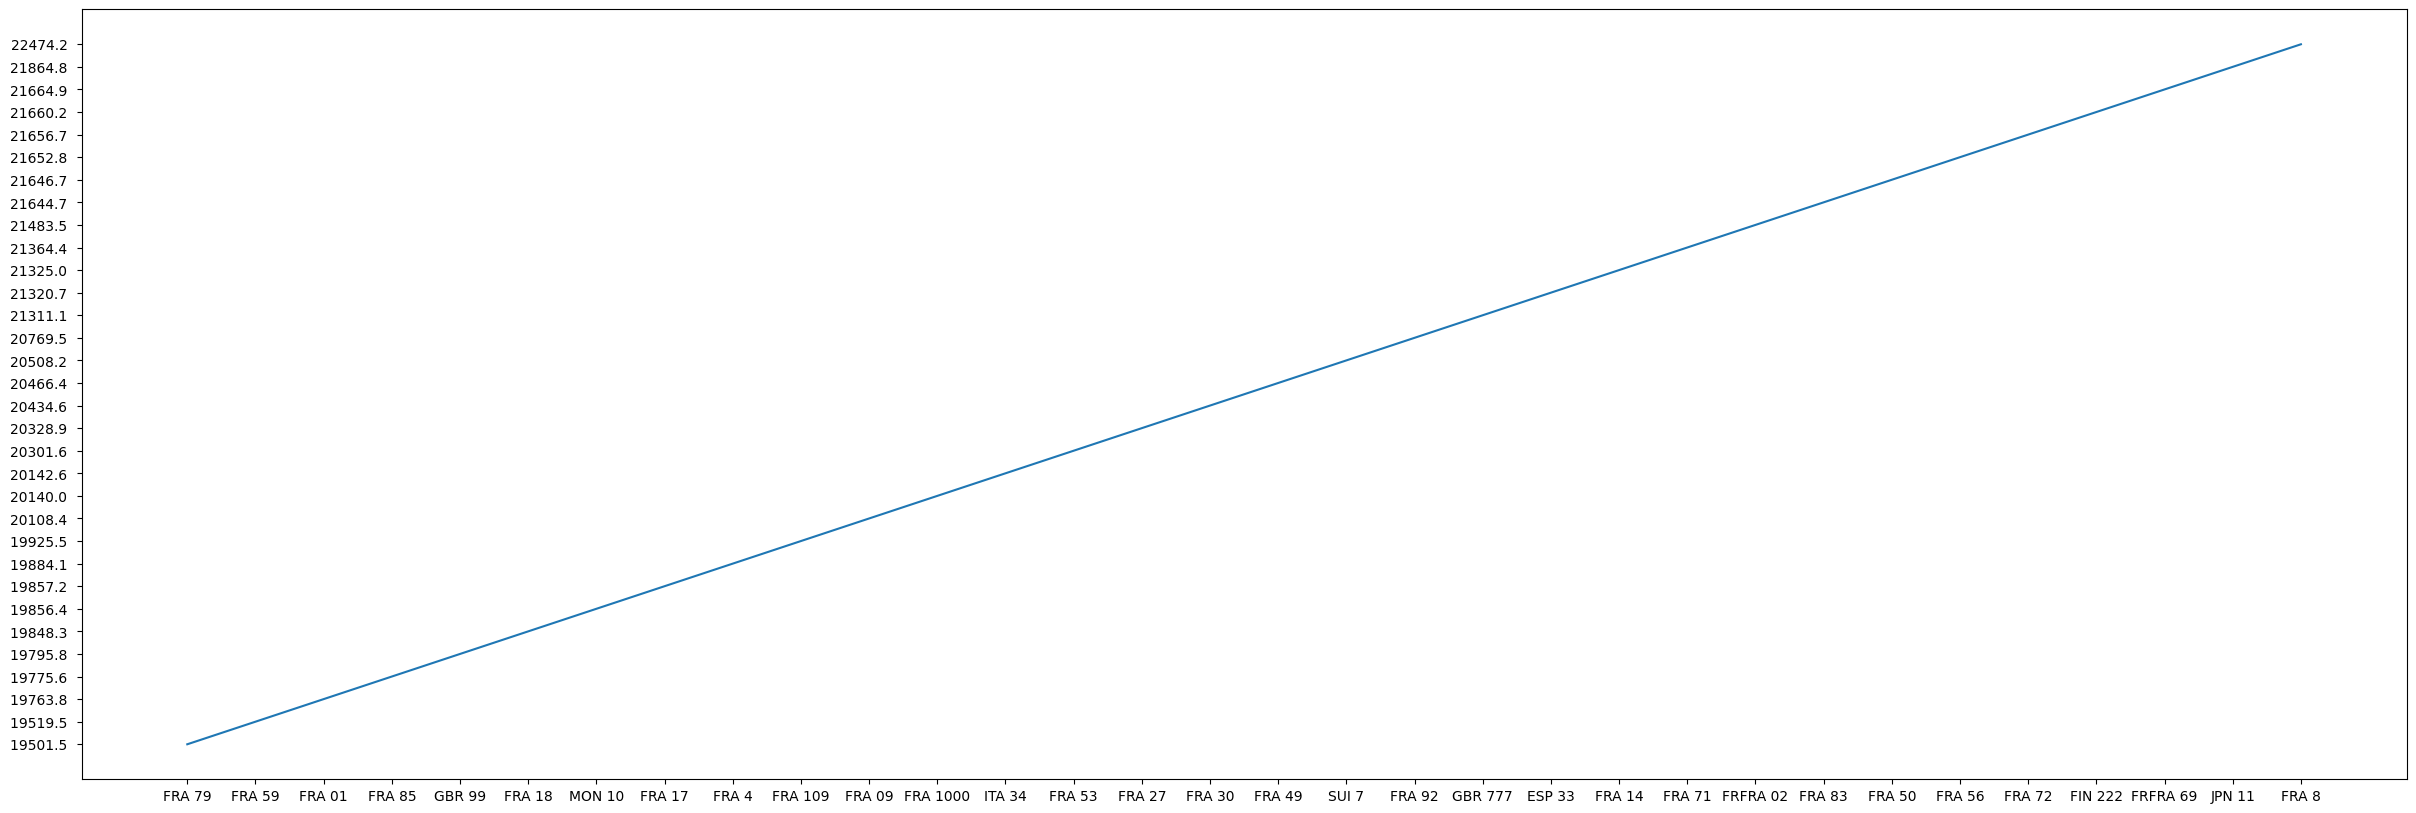

In [103]:
donnees = base_finale[['Nationalité', 'DTF']]
display(donnees)
fig = matplotlib.pyplot.figure(figsize=(30,10)) # pour augmenter la taille de la figure (vu plus tard)
matplotlib.pyplot.plot(donnees['Nationalité'], donnees['DTF'])

Autres données représentées: la vitesse en fonction du skipper, avant il faut supprimer l'unité "kts"

In [104]:
base_finale['Vitesse_last'].replace('kts','',regex=True,inplace=True) 
display(base_finale)

/var/folders/gp/4x8fg8dj6kl1b8qdc6108qp80000gn/T/ipykernel_5318/1104933784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_finale['Vitesse_last'].replace('kts','',regex=True,inplace=True)


,Rang,Nationalité,Skipper,Heure,Latitude,Longitude,Cap_30,Vitesse_30,VMG_30,Distance_30,Cap_last,Vitesse_last,VMG_last,Distance_last,Cap_24,Vitesse_24,VMG_24,Distance_24,DTF,DTL
4,1,FRA 79,Charlie Dalin\nAPIVIA,08:30 FR\n,29°02.17'S,22°13.39'W,212°,14.7 kts,1.2 kts,7.3 nm,125°,13.1,13.1 kts,52.2 nm,142°,11.9 kts,11.6 kts,285.8 nm,19501.5,0.0 nm
5,2,FRA 59,Thomas Ruyant\nLinkedOut,08:30 FR\n,29°06.42'S,22°42.66'W,207°,12.9 kts,2.1 kts,6.5 nm,169°,9.1,6.8 kts,36.5 nm,156°,10.8 kts,9.7 kts,260.0 nm,19519.5,18.0 nm
6,3,FRA 01,Jean Le Cam\nYes we Cam !,08:30 FR\n,24°36.84'S,24°05.80'W,129°,10.1 kts,9.6 kts,5.0 nm,147°,8.2,8.2 kts,32.8 nm,151°,10.3 kts,10.3 kts,247.4 nm,19763.8,262.3 nm
7,4,FRA 85,Kevin Escoffier\nPRB,08:30 FR\n,25°27.51'S,25°33.78'W,138°,15.6 kts,15.5 kts,7.8 nm,137°,13.6,13.6 kts,54.6 nm,136°,11.8 kts,11.8 kts,283.0 nm,19775.6,274.2 nm
8,5,GBR 99,Alex Thomson\nHUGO BOSS,08:30 FR\n,25°53.75'S,26°28.34'W,132°,5.5 kts,5.5 kts,2.8 nm,133°,5.2,5.2 kts,20.8 nm,163°,3.0 kts,2.5 kts,71.1 nm,19795.8,294.4 nm
9,6,FRA 18,Louis Burton\nBureau Vallée 2,08:30 FR\n,25°24.54'S,27°16.99'W,132°,11.2 kts,11.2 kts,5.6 nm,144°,13.3,12.9 kts,53.3 nm,141°,12.0 kts,11.8 kts,288.9 nm,19848.3,346.9 nm
10,7,MON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,08:30 FR\n,24°30.56'S,26°36.92'W,139°,13.6 kts,13.6 kts,6.8 nm,138°,12.7,12.7 kts,50.8 nm,140°,10.2 kts,10.2 kts,244.9 nm,19856.4,355.0 nm
11,8,FRA 17,Yannick Bestaven\nMaître Coq IV,08:30 FR\n,24°14.63'S,26°20.23'W,149°,11.8 kts,11.6 kts,5.9 nm,150°,12.5,12.2 kts,50.0 nm,148°,10.8 kts,10.7 kts,258.2 nm,19857.2,355.8 nm
12,9,FRA 4,Sébastien Simon\nARKEA PAPREC,08:30 FR\n,24°40.36'S,27°27.96'W,146°,13.7 kts,13.2 kts,6.8 nm,140°,13.0,12.9 kts,52.0 nm,140°,10.8 kts,10.7 kts,258.6 nm,19884.1,382.6 nm
13,10,FRA 109,Samantha Davies\nInitiatives - Coeur,08:30 FR\n,24°03.43'S,27°52.83'W,146°,15.9 kts,15.4 kts,7.9 nm,144°,11.7,11.5 kts,46.8 nm,150°,10.4 kts,10.1 kts,248.5 nm,19925.5,424.0 nm


,Nationalité,Vitesse_last
4,FRA 79,13.1
5,FRA 59,9.1
6,FRA 01,8.2
7,FRA 85,13.6
8,GBR 99,5.2
9,FRA 18,13.3
10,MON 10,12.7
11,FRA 17,12.5
12,FRA 4,13.0
13,FRA 109,11.7


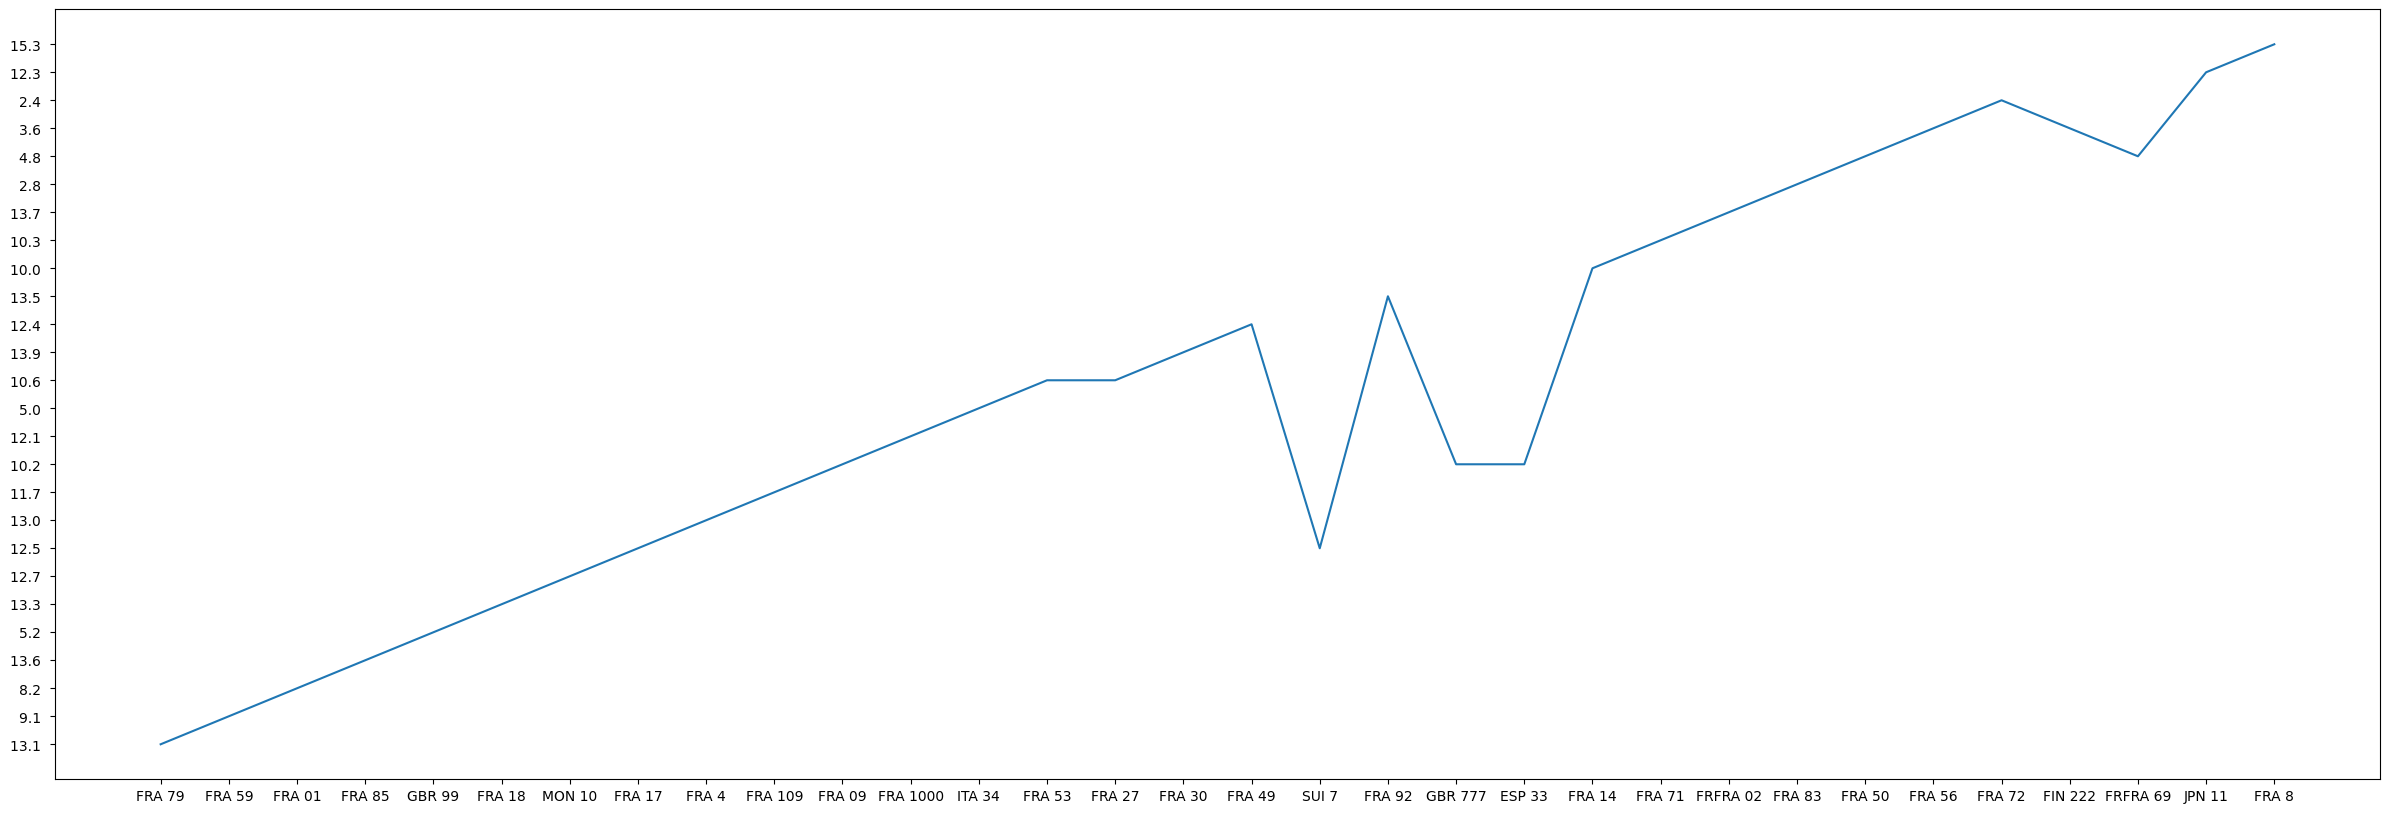

In [105]:
donnees2 = base_finale[['Nationalité', 'Vitesse_last']]
display(donnees2)
fig = matplotlib.pyplot.figure(figsize=(30,10))
matplotlib.pyplot.plot(donnees2['Nationalité'], donnees2['Vitesse_last'])

# Exercice

La base de données "elections-presidentielles-2017-1ertour.csv" extraite du site https://opendata.paris.fr/explore/dataset/elections-presidentielles-2017-1ertour/information/?disjunctive.id_bvote&disjunctive.num_circ&disjunctive.num_quartier&disjunctive.num_arrond contient les résultats du 1er tour des élections présidentielles du 23 avril 2017 par bureau de vote, quartier, arrondissement et circonscription.

### Pour les utilisateurs de Colab
rajouter 

from google.colab import files

uploaded = files.upload()

In [106]:
data_presidentielles = pandas.read_csv("/Users/thomasroujou/Desktop/elections-presidentielles-2017-1ertour.csv",  sep =';')

In [107]:
print(data_presidentielles)

    ID_BVOTE         SCRUTIN  ANNEE  TOUR        DATE  NUM_CIRC  NUM_QUARTIER  \
0      15-49  Présidentielle   2017     1  2007-04-23        13            57   
1      15-51  Présidentielle   2017     1  2007-04-23        13            57   
2      15-77  Présidentielle   2017     1  2007-04-23        13            58   
3      16-42  Présidentielle   2017     1  2007-04-23        14            63   
4      16-55  Présidentielle   2017     1  2007-04-23         4            64   
..       ...             ...    ...   ...         ...       ...           ...   
891    18-64  Présidentielle   2017     1  2007-04-23        17            72   
892    18-67  Présidentielle   2017     1  2007-04-23         3            69   
893    19-24  Présidentielle   2017     1  2007-04-23        16            75   
894    20-21  Présidentielle   2017     1  2007-04-23        15            78   
895    20-33  Présidentielle   2017     1  2007-04-23        15            77   

     NUM_ARROND  NUM_BUREAU

1. Extraire le nombre de voix pour le candidat Jean-Luc MÉLENCHON

2. Représenter sous forme d'histogramme le nombre de voix obtenues par Jean-Luc MÉLENCHON.

3. Compter le nombre de bureaux de vote par arrondissement.

4. Extraire le nombre de voix obtenues par Benoît Hamon dans chaque bureau de vote.

5. Extraire le nombre de voix obtenues par chaque candidat et par arrondissement.

6. Représenter sous forme de camembert, de barres le nombre de voix des 4 candidats 'LE PEN Marine', 'MACRON Emmanuel','MÉLENCHON Jean-Luc', 'FILLON François', par arrondissement. Quelle représentation vous semble être la plus adaptée?

7. Représenter sous forme graphique d'autres données extraites de ce tableau. Vous choisirez celles qui vous paraissent représentatives.


210548
ID_BVOTE
1-1     121
1-10     50
1-2     152
1-3     150
1-4     235
       ... 
9-5     159
9-6     141
9-7     117
9-8     113
9-9     137
Name: MÉLENCHON Jean-Luc, Length: 896, dtype: int64


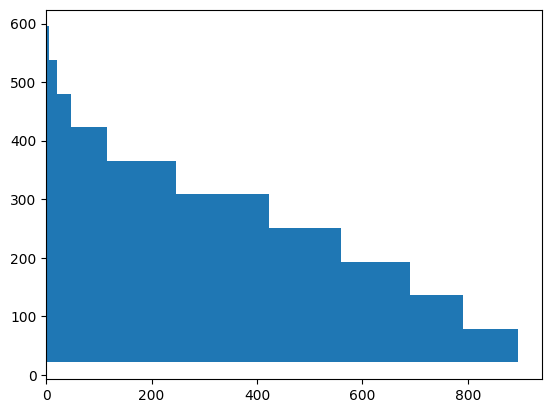

In [114]:
#Questions1
votes_melenchon = data_presidentielles['MÉLENCHON Jean-Luc'].sum()
print( votes_melenchon)
#Questions2
votes_melenchon_par_bureau = data_presidentielles.groupby('ID_BVOTE')['MÉLENCHON Jean-Luc'].sum()
print(votes_melenchon_par_bureau)
plt.hist(votes_melenchon_par_bureau, cumulative = -1,orientation = 'horizontal')
plt.show()

In [115]:
#questions3

In [116]:
#questions3

bureaux_par_arrondissement = data_presidentielles['NUM_ARROND'].value_counts()
print(bureaux_par_arrondissement)

NUM_ARROND
15    95
20    76
13    71
19    70
16    68
18    68
17    67
12    64
14    57
11    55
10    39
9     27
5     25
7     25
6     22
8     18
3     15
4     14
1     10
2     10
Name: count, dtype: int64


In [117]:
#questions3

bureaux_par_arrondissement = data_presidentielles['NUM_ARROND'].value_counts()
print(bureaux_par_arrondissement)

NUM_ARROND
15    95
20    76
13    71
19    70
16    68
18    68
17    67
12    64
14    57
11    55
10    39
9     27
5     25
7     25
6     22
8     18
3     15
4     14
1     10
2     10
Name: count, dtype: int64


In [118]:
#quesstions4
votes_hamon_par_bureau = data_presidentielles.groupby('NUM_BUREAU')['HAMON Benoît'].sum()
print(votes_hamon_par_bureau)

NUM_BUREAU
1     2205
2     2238
3     2306
4     2354
5     2275
      ... 
91      81
92     103
93      97
94      82
95     120
Name: HAMON Benoît, Length: 95, dtype: int64


In [119]:
#questions5
colonnes_candidats = ['LE PEN Marine', 'MACRON Emmanuel', 'MÉLENCHON Jean-Luc', 'FILLON François', 
                      'HAMON Benoît', 'POUTOU Philippe', 'ASSELINEAU François', 'LASSALLE Jean',
                      'ARTHAUD Nathalie', 'CHEMINADE Jacques']

votes_par_candidat_par_arrondissement = data_presidentielles.groupby('NUM_ARROND')[colonnes_candidats].sum()
print(votes_par_candidat_par_arrondissement)

            LE PEN Marine  MACRON Emmanuel  MÉLENCHON Jean-Luc  \
NUM_ARROND                                                       
1                     443             3561                1231   
2                     399             5013                1802   
3                     615             8325                3078   
4                     735             6182                2329   
5                    1225            12316                4960   
6                     719             8729                2038   
7                    1064             8785                1552   
8                     916             6568                1392   
9                    1092            14029                4783   
10                   1817            16880               11396   
11                   3035            29191               17877   
12                   4385            26942               15613   
13                   5745            30719               21681   
14        

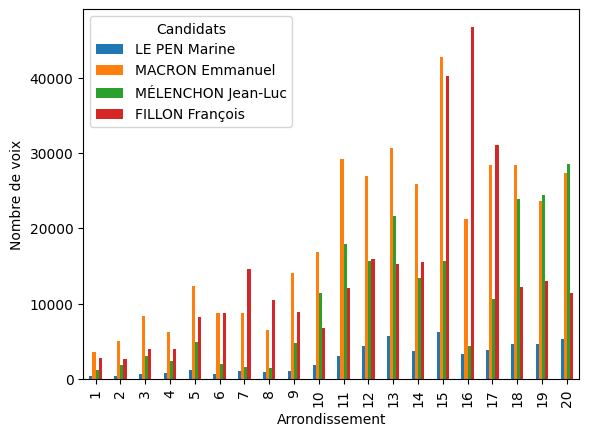

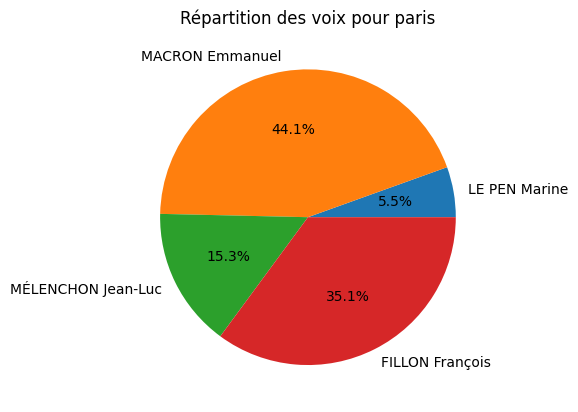

In [130]:
#questions6
candidats_principaux = ['LE PEN Marine', 'MACRON Emmanuel', 'MÉLENCHON Jean-Luc', 'FILLON François']

votes_principaux = data_presidentielles[['NUM_ARROND'] + candidats_principaux]
votes_principaux_par_arrondissement = votes_principaux.groupby('NUM_ARROND').sum()


votes_principaux_par_arrondissement.plot(kind='bar')
plt.xlabel("Arrondissement")
plt.ylabel("Nombre de voix")
plt.legend(title="Candidats")
plt.show()



votes_sample.plot.pie(autopct='%1.1f%%', title="Répartition des voix pour paris")
plt.ylabel("")
plt.show()


#le graphique en batonn semble plus interessant pour mesurer les grandes disparités en pourcentages par arrondissement à paris(percée de Francois
#Fillon dans le 16ème

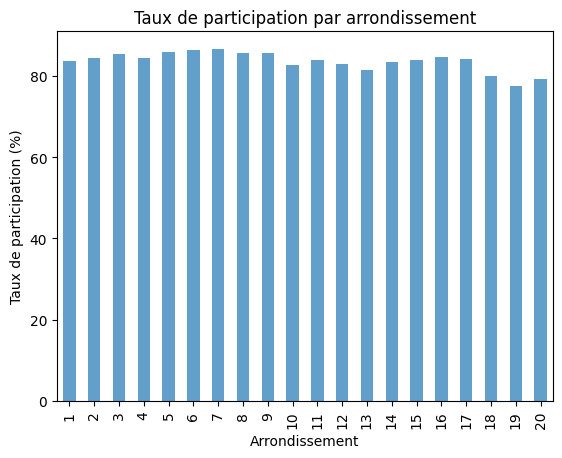

In [134]:
#questions7
# Calcul du taux de participation
data_presidentielles['NB_PARTICIPANTS'] = data_presidentielles['NB_VOTANT'] - data_presidentielles['NB_BL'] - data_presidentielles['NB_NUL']
participation_par_arrondissement = data_presidentielles.groupby('NUM_ARROND')[['NB_INSCR', 'NB_PARTICIPANTS']].sum()
participation_par_arrondissement['Taux de participation'] = (participation_par_arrondissement['NB_PARTICIPANTS'] / participation_par_arrondissement['NB_INSCR']) * 100

# Graphique
participation_par_arrondissement['Taux de participation'].plot(kind='bar',alpha=0.7)
plt.title("Taux de participation par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Taux de participation (%)")
plt.show()